## Importation des modules

In [ ]:
# On s'assure que toutes les modifications apportées aux bibliothèques sont automatiquement rechargées ici
%reload_ext autoreload
%autoreload 2

# On importe le module matpltlib afin de pouvoir afficher les graphiques pendant nos executions
%matplotlib inline

In [ ]:
#On importe le module files et os qui vont nous être utiles pour la suite du programme. 
from google.colab import files
import os

In [ ]:
# Le module fastai va nous permettre d'avoir des résultats plus rapidement en termes de DeepLearning standard
from fastai.vision import *

In [ ]:
# Evite les messages d'alertes du à l'obsolescence du module
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

## Télécharger le dataset via Kaggle

Pour télécharger votre token API, il vous faut ce rendre sur le lien suivant : 

https://www.kaggle.com/nomdutilisateur/account

Puis sur "*Create New API Token*".

In [ ]:
# Une fois votre token Kaggle
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Renvoie les éléments du répertoire de travail 
os.listdir()

['.config', 'kaggle.json', 'sample_data']

In [ ]:
# On créer le  répertoire où l'on va mettre notre dataset 
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [ ]:
# C'est le chemin, d'accès de notre dataset
chemin = Config.data_path()/'architecture'
chemin.mkdir(parents=True, exist_ok=True)
chemin

PosixPath('/root/.fastai/data/architecture')

In [ ]:
#On télécharge le dataset
! kaggle datasets download -d wwymak/architecture-dataset

 99% 1.42G/1.43G [00:09<00:00, 162MB/s]
100% 1.43G/1.43G [00:09<00:00, 154MB/s]


In [ ]:
#On s'assure que le dataset est bien téléchargé, en le voyant apparaître dans le répertoire de travail
os.listdir()

['.config', 'architecture-dataset.zip', 'sample_data']

In [ ]:
# Une fois bien téléchargé, on le met dans le répertoire, en dezipant
! unzip -q -n architecture-dataset.zip -d {chemin}

## Etude des données

Nous allons utiliser le jeu de données Architecture de Zhe Xu, qui présente 25 styles d'architecture. Notre modèle devra apprendre à faire la différence entre ces 25 catégories distinctes.

In [ ]:
os.listdir('/root/.fastai/data/architecture/arcDataset')

['Georgian architecture',
 'International style',
 'Novelty architecture',
 'Greek Revival architecture',
 'ReadMe~',
 'Postmodern architecture',
 'Romanesque architecture',
 'Beaux-Arts architecture',
 'Gothic architecture',
 'Art Deco architecture',
 'Bauhaus architecture',
 'Russian Revival architecture',
 'Chicago school architecture',
 'arcNames25.txt',
 'Baroque architecture',
 'Queen Anne architecture',
 'Colonial architecture',
 'relationship.txt',
 'arcRelationship25.txt',
 'ReadMe',
 'Deconstructivism',
 'Edwardian architecture',
 'Achaemenid architecture',
 'Tudor Revival architecture',
 'Ancient Egyptian architecture',
 'American Foursquare architecture',
 'American craftsman style',
 'Byzantine architecture',
 'Art Nouveau architecture',
 'Palladian architecture']

In [ ]:
# Le chemin de notre data set est celui ci-dessous :
# chemin = '/root/.fastai/data/architecture/architectural-styles-dataset'

La première chose que nous faisons lorsque nous abordons un problème est d'examiner les données. Nous devons toujours bien comprendre la nature du problème et l'aspect des données avant de pouvoir déterminer comment le résoudre. Examiner les données signifie comprendre comment les répertoires de données sont structurés, quelles sont les étiquettes et à quoi ressemblent quelques exemples d'images.



In [ ]:
# Cela va permettre de selectionner des images différentes, afin de s'assurer que nos résultats ne sont pas le fruit du hasard.
np.random.seed(42)

In [ ]:
# On va transformer nos images afin d'augmenter notre dataset, on en parlera plus tard
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10, max_zoom=1.1, 
                      max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

## Affichage des images, et études brèves du dataset

Dans cet ensemble de données particulier, les étiquettes sont stockées dans le nom du dossier qui contient les images de chaque classe. Nous devrons les extraire pour pouvoir classer les images dans les bonnes catégories. La bibliothèque fastai a une fonction faite pour cela, `ImageDataBunch.from_folder`.

In [ ]:
data = ImageDataBunch.from_folder(chemin, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=224, num_workers=4, padding_mode='reflection', bs=64).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  return _solve_func(B,A)[0][:,0]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if 

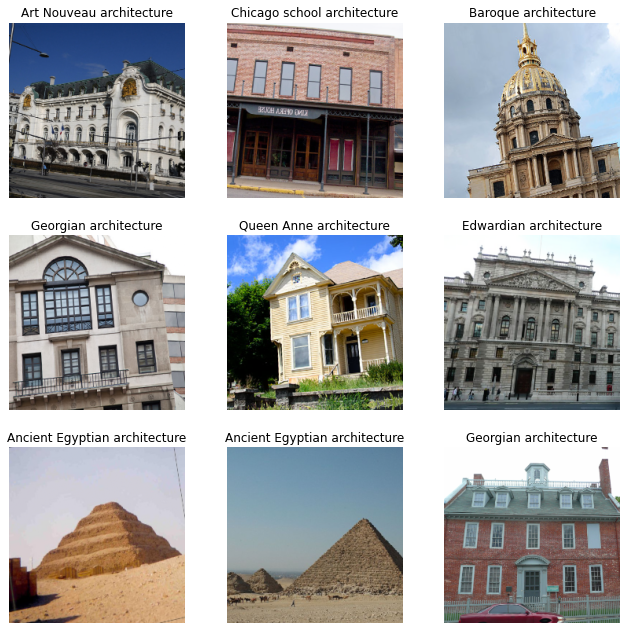

In [ ]:
#On affiche 9 images de notre set aléatoirement
data.show_batch(rows=3, figsize=(9, 9))

In [ ]:
#On regroupe les différentes catégories ensemble.
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Achaemenid architecture',
  'American Foursquare architecture',
  'American craftsman style',
  'Ancient Egyptian architecture',
  'Art Deco architecture',
  'Art Nouveau architecture',
  'Baroque architecture',
  'Bauhaus architecture',
  'Beaux-Arts architecture',
  'Byzantine architecture',
  'Chicago school architecture',
  'Colonial architecture',
  'Deconstructivism',
  'Edwardian architecture',
  'Georgian architecture',
  'Gothic architecture',
  'Greek Revival architecture',
  'International style',
  'Novelty architecture',
  'Palladian architecture',
  'Postmodern architecture',
  'Queen Anne architecture',
  'Romanesque architecture',
  'Russian Revival architecture',
  'Tudor Revival architecture'],
 25,
 7671,
 1917)

#### Augmentation de notre base de donnée

La fonction `get_transforms` nous a permis d'obtenir plus d'images pour l'entraînement, dans ce cas nous avons 9588 images au lieu des 4979 de l'ensemble de données original.

Ceci est réalisé en faisant quelques changements aux images et en les traitant comme des images nouvelles.

Retournement (juste horizontal), zoom, lumière, rotation, etc...

In [ ]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


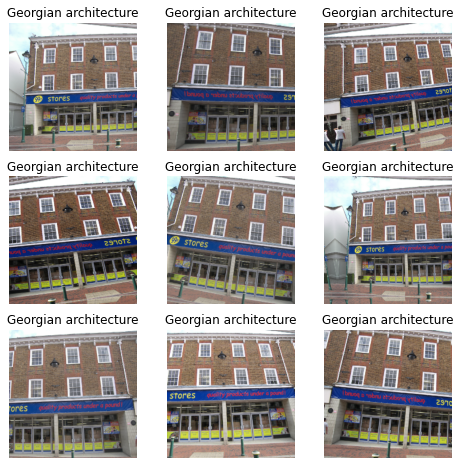

In [ ]:
plot_multi(_plot, 3, 3, figsize=(8,8))

## Apprentissage : Constitution de notre réseau de neurones convolutifs



Maintenant que notre dataset d'images à été traité, nous pouvons dès à présent l'utiliser pour entraîner notre première couche de réseaux de neurones convolutifs. Pour cela, on va utiliser un réseau de neurones largement utilisé et déjà pré-entraînés sur notre modèle : resnet34. Ce réseau de neurones convolutifs ayant 34 couches de neurones

### Apprentissage

Ici, on va utiliser la fonction "cnn_learner" de la bibliothèque pytorch : Elle prend en entrée l'objet "data" (qui est notre dataset traité et normalisé précedemment), le nom du modèle (resnet34) et les paramètres que l'on cherche à observer (ici "l'accuracy" (précision) et le taux d'erreur)


In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
# Epochs = nombre de "tours" du réseaux de neurones que le modèle fait
# Valid_loss = résultat de la fonction de coût sur le jeu de données de validation
# Train_loss = résultat de la fonction de coût sur le jeu de données d'entraînement
#Accuracy = précision du modèle : c'est la proportion de bonnes prédiction

#Time = temps pour chaque epoch
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.242046,1.207843,0.631195,03:47


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


KeyboardInterrupt: ignored

In [ ]:
learn.save('stage-1-resnet34') #Par la fonction .save() de f permet d'enregistrer le réseaux "learn" dans le répertoire courant

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learn) #La bibliothèque fastai fournit la classe ClassificationInterpretation, on crée notre objet
#intepretation  
interpretation.plot_confusion_matrix(figsize=(12,12), title = "Matrice de confusion", cmap = "YlOrRd", dpi=70) #Méthode d'instance permettant d'afficher
# la matrice de confusion, le coefficient (i,j) de cette matrice affiche combiens de fois le j-ème élement a été prédit alors que la véritable valeur était le i-ème élement


In [ ]:
learn.export() #Maintenant on export notre modèle dans le dossier root, il est entraîné et doit être utilisé sur des images tests
!cp /root/.fastai/data/architecture/export.pkl . #On le copie dans le répertoire courrant


In [ ]:
image = open_image('imagetest.jpg') #On ajoute manuellement, dans le répertoire courant, l'image que
#l'on veut prédire (à rénommer imagetest impérativement)

In [ ]:
learn = load_learner(chemin) #La méthode load_learner de fastai prend en paramètre un chemin et renvoie le modèle dans une variable
#learn

In [ ]:
prediction,pred_idx,outputs = learn.predict(image) #la modèle d'instance predict(image) renvoie notre prédiction sous la forme d'un objet
#de la classe Prediction (bibliothèque fastai) 
prediction.obj #la méthode obj de prediction renvoie sous forme de string, la prédiction